In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [48]:
cc_data = pd.read_csv("cc_data.csv")

In [49]:
cc_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [50]:
cc_data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [51]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [52]:
cc_data.Approved.value_counts()

-    383
+    307
Name: Approved, dtype: int64

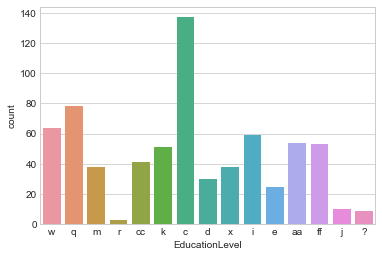

In [54]:
sns.set_style("whitegrid")
sns.countplot(x="EducationLevel",data=cc_data)

In [55]:
cc_data.EducationLevel.value_counts()

c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64

In [29]:
cc_data.shape

(690, 16)

In [30]:
#cc_data.fillna(cc_data.mean(),inplace=True)

In [31]:
cc_data.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
680,b,19.5,0.290,u,g,k,v,0.290,f,f,0,f,g,280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,140,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,240,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,400,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,280,750,-
689,b,35,3.375,u,g,c,h,8.290,f,f,0,t,g,0,0,-


In [32]:
#def distributionPlot(col):
#    sns.distplot(col)
#    plt.show()
#distributionPlot(cc_data['Male'])

In [33]:
corrmat

,Debt,YearsEmployed,CreditScore,Income
Debt,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.298902,1.000000,0.322330,0.051345
CreditScore,0.271207,0.322330,1.000000,0.063692
Income,0.123121,0.051345,0.063692,1.000000


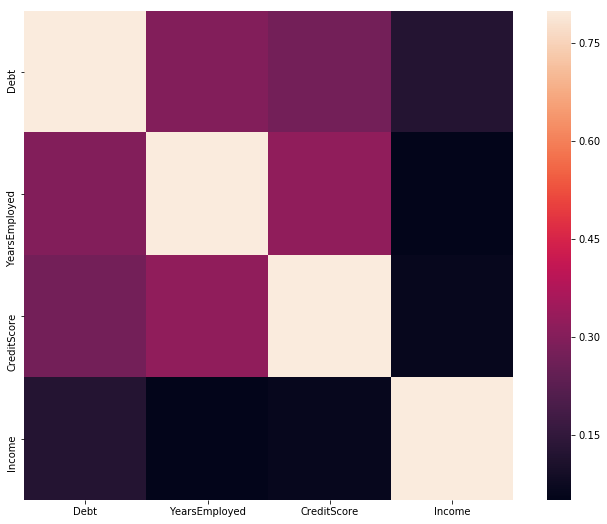

In [34]:
corrmat = cc_data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cc_data:
    if cc_data[col].dtypes=='object':
        cc_data[col]=le.fit_transform(cc_data[col])

In [36]:
cc_data.tail(15)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
675,1,248,1.040,2,1,1,8,0.665,0,0,0,0,0,61,237,1
676,1,153,10.665,2,1,11,4,0.085,0,1,12,1,0,11,3,1
677,2,36,7.250,2,1,10,8,0.040,0,1,1,0,0,1,1,1
678,1,20,10.210,2,1,6,3,0.000,0,0,0,0,0,0,50,1
679,1,42,1.250,2,1,2,8,0.000,0,0,0,0,0,0,0,1
680,2,37,0.290,2,1,9,8,0.290,0,0,0,0,0,74,364,1
681,2,125,1.000,3,3,4,4,3.000,0,0,0,0,0,32,537,1
682,2,12,3.290,2,1,7,8,0.335,0,0,0,1,0,15,2,1
683,2,208,0.750,3,3,4,8,0.585,0,0,0,0,0,61,3,1
684,2,240,3.290,2,1,10,8,3.500,0,0,0,1,2,111,0,1


In [38]:
cc_data = cc_data.drop(['DriversLicense', 'ZipCode'], axis=1)
cc_data = cc_data.values

In [39]:
cc_data.shape

(690, 14)

In [44]:
from sklearn.model_selection import train_test_split
# Creating new variable to input features and labels
X,y = cc_data[:,0:13] , cc_data[:,13]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, y_test))
# Evaluate the confusion_matrix
confusion_matrix(y_test, y_pred)

Random Forest classifier has accuracy of:  0.8695652173913043


array([[48, 14],
       [ 4, 72]], dtype=int64)

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=100,penalty='l2')
logreg.fit(rescaledX_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
pred = logreg.predict(rescaledX_test)

In [59]:
logreg.score(rescaledX_test, y_test)

0.8695652173913043

In [61]:
confusion_matrix(y_test, pred)

array([[54,  8],
       [10, 66]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8695652173913043